Copyright **`(c)`** 2025 Giovanni Squillero `<giovanni.squillero@polito.it>`  
[`https://github.com/squillero/computational-intelligence`](https://github.com/squillero/computational-intelligence)  
Free under certain conditions — see the [`license`](https://github.com/squillero/computational-intelligence/blob/master/LICENSE.md) for details.  

In [1]:
import logging
from itertools import combinations

import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

from icecream import ic

Cost: $d + (d \cdot \alpha \cdot w)^\beta$ with $\alpha \ge 0$ and $\beta \ge 0$

In [2]:
class Problem:
    _graph: nx.Graph
    _alpha: float
    _beta: float

    def __init__(
        self,
        num_cities: int,
        *,
        alpha: float = 1.0,
        beta: float = 1.0,
        density: float = 0.5,
        seed: int = 42,
    ):
        rng = np.random.default_rng(seed)
        self._alpha = alpha
        self._beta = beta
        cities = rng.random(size=(num_cities, 2))
        cities[0, 0] = cities[0, 1] = 0.5

        self._graph = nx.Graph()
        self._graph.add_node(0, pos=(cities[0, 0], cities[0, 1]), gold=0)
        for c in range(1, num_cities):
            self._graph.add_node(c, pos=(cities[c, 0], cities[c, 1]), gold=(1 + 999 * rng.random()))

        tmp = cities[:, np.newaxis, :] - cities[np.newaxis, :, :]
        d = np.sqrt(np.sum(np.square(tmp), axis=-1))
        for c1, c2 in combinations(range(num_cities), 2):
            if rng.random() < density or c2 == c1 + 1:
                self._graph.add_edge(c1, c2, dist=d[c1, c2])

        assert nx.is_connected(self._graph)

    @property
    def graph(self) -> nx.Graph:
        return nx.Graph(self._graph)

    @property
    def alpha(self):
        return self._alpha

    @property
    def beta(self):
        return self._beta

    def cost(self, path, weight):
        dist = nx.path_weight(self._graph, path, weight='dist')
        return dist + (self._alpha * dist * weight) ** self._beta

    def baseline(self):
        total_cost = 0
        for dest, path in nx.single_source_dijkstra_path(
            self._graph, source=0, weight='dist'
        ).items():
            cost = 0
            for c1, c2 in zip(path, path[1:]):
                cost += self.cost([c1, c2], 0)
                cost += self.cost([c1, c2], self._graph.nodes[dest]['gold'])
            logging.debug(
                f"dummy_solution: go to {dest} ({' > '.join(str(n) for n in path)} ({cost})"
            )
            total_cost += cost
        return total_cost

    def plot(self):
        plt.figure(figsize=(10, 10))
        pos = nx.get_node_attributes(self._graph, 'pos')
        size = [100] + [self._graph.nodes[n]['gold'] for n in range(1, len(self._graph))]
        color = ['red'] + ['lightblue'] * (len(self._graph) - 1)
        return nx.draw(self._graph, pos, with_labels=True, node_color=color, node_size=size)

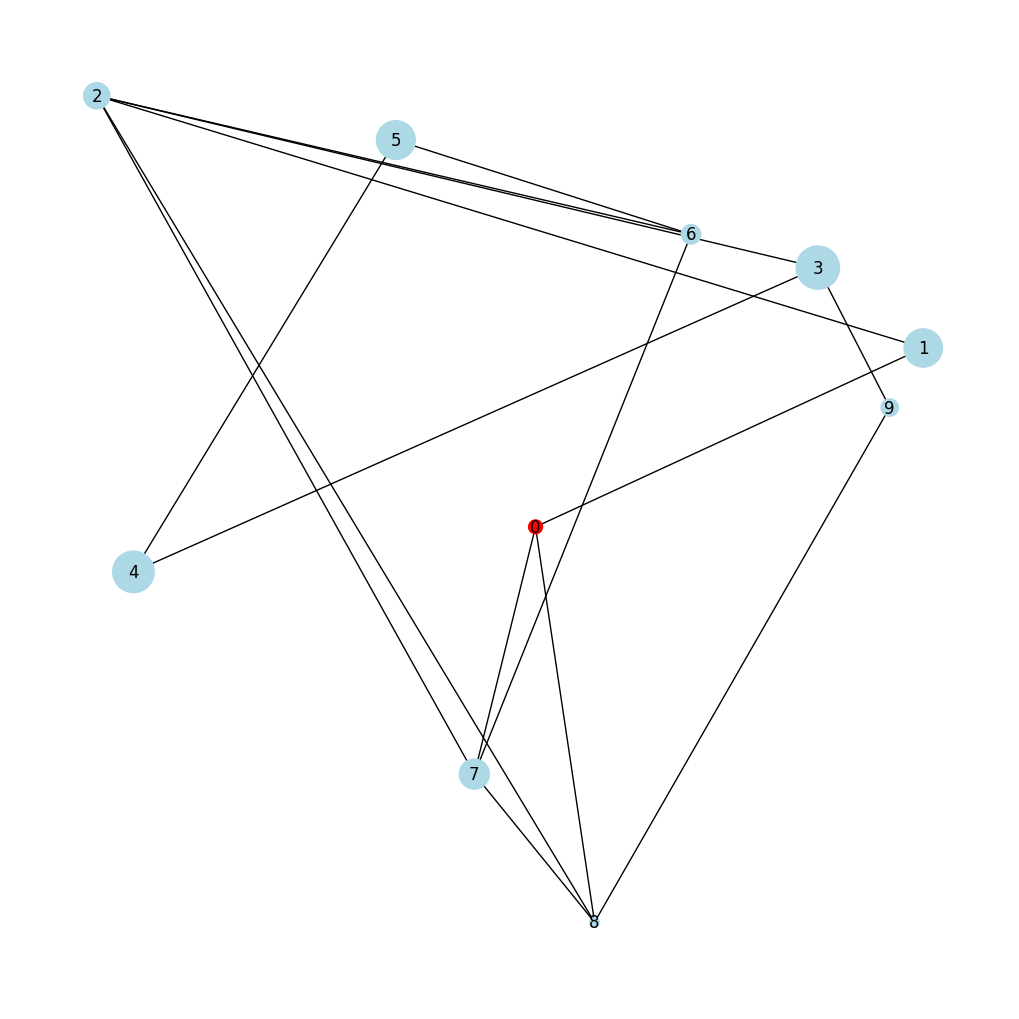

In [3]:
P = Problem(10, density=0.2, alpha=1, beta=1)
P.plot()

In [ ]:
logging.getLogger().setLevel(logging.WARNING)

ic(Problem(100, density=0.2, alpha=1, beta=1).baseline())
ic(Problem(100, density=0.2, alpha=2, beta=1).baseline())
ic(Problem(100, density=0.2, alpha=1, beta=2).baseline())
ic(Problem(100, density=1, alpha=1, beta=1).baseline())
ic(Problem(100, density=1, alpha=2, beta=1).baseline())
ic(Problem(100, density=1, alpha=1, beta=2).baseline())
ic(Problem(1_000, density=0.2, alpha=1, beta=1).baseline())
ic(Problem(1_000, density=0.2, alpha=2, beta=1).baseline())
ic(Problem(1_000, density=0.2, alpha=1, beta=2).baseline())
ic(Problem(1_000, density=1, alpha=1, beta=1).baseline())
ic(Problem(1_000, density=1, alpha=2, beta=1).baseline())
ic(Problem(1_000, density=1, alpha=1, beta=2).baseline())
ic(Problem(1_000, density=0.2, alpha=1, beta=0.5).baseline())
None

ic| Problem(100, density=0.2, alpha=1, beta=1).baseline(): np.float64(25266.40561851072)
ic| Problem(100, density=0.2, alpha=2, beta=1).baseline(): np.float64(50425.30961817918)
ic| Problem(100, density=0.2, alpha=1, beta=2).baseline(): np.float64(5334401.927002504)
ic| Problem(100, density=1, alpha=1, beta=1).baseline(): np.float64(18266.18579582672)
ic| Problem(100, density=1, alpha=2, beta=1).baseline(): np.float64(36457.918462372065)
ic| Problem(100, density=1, alpha=1, beta=2).baseline(): np.float64(5404978.08899582)
ic| Problem(1_000, density=0.2, alpha=1, beta=1).baseline(): np.float64(195402.95810394012)
ic| Problem(1_000, density=0.2, alpha=2, beta=1).baseline(): np.float64(390028.72126288974)
ic| Problem(1_000, density=0.2, alpha=1, beta=2).baseline(): np.float64(37545927.70213464)
ic| Problem(1_000, density=1, alpha=1, beta=1).baseline(): np.float64(192936.23377726765)
ic| Problem(1_000, density=1, alpha=2, beta=1).baseline(): np.float64(385105.64149576554)
ic| Problem(1_000

In [9]:
ic(Problem(100, density=0.2, alpha=1, beta=0.5).baseline())

ic| Problem(100, density=0.2, alpha=1, beta=0.5).baseline

(): np.float64(2231.047939971318)


np.float64(2231.047939971318)

In [5]:
import networkx as nx
import pandas as pd

# Crea l'istanza del problema
p = Problem(10, density=1, alpha=1, beta=1, seed=42)

# Estrai la matrice delle adiacenze usando il peso 'dist'
# Le celle con 0.0 indicano che NON c'è un collegamento diretto (o è il nodo stesso)
dist_matrix = nx.to_pandas_adjacency(p.graph, weight='dist')

print("Matrice delle Distanze (Adiacenze):")
print(dist_matrix)

Matrice delle Distanze (Adiacenze):
          0         1         2         3         4         5         6  \
0  0.000000  0.409325  0.625227  0.387333  0.375181  0.445894  0.353373   
1  0.409325  0.000000  0.813489  0.131777  0.771108  0.539047  0.248664   
2  0.625227  0.813489  0.000000  0.693377  0.526332  0.280902  0.570546   
3  0.387333  0.131777  0.693377  0.000000  0.716521  0.414926  0.122882   
4  0.375181  0.771108  0.526332  0.716521  0.000000  0.534633  0.636131   
5  0.445894  0.539047  0.280902  0.414926  0.534633  0.000000  0.292203   
6  0.353373  0.248664  0.570546  0.122882  0.636131  0.292203  0.000000   
7  0.278569  0.627215  0.825860  0.642834  0.386276  0.703285  0.628353   
8  0.439585  0.702717  1.021452  0.751203  0.575598  0.882302  0.764178   
9  0.353097  0.072635  0.810100  0.168108  0.722625  0.543857  0.265119   

          7         8         9  
0  0.278569  0.439585  0.353097  
1  0.627215  0.702717  0.072635  
2  0.825860  1.021452  0.810100  
3 

In [6]:
import networkx as nx

# Istanzia il problema
p = Problem(100, density=1, alpha=1, beta=1, seed=42)

# Estrai il dizionario dell'oro
gold_map = nx.get_node_attributes(p.graph, 'gold')

print("Mappa Nodo -> Oro:")
print(gold_map)

Mappa Nodo -> Oro:
{0: 0, 1: 777.6274334029364, 2: 971.8545996349064, 3: 501.24044501614, 4: 144.75360504869954, 5: 14.922351420493342, 6: 230.4263739688564, 7: 132.69039556873452, 8: 677.9810149392446, 9: 122.7106721239026, 10: 506.8236016890124, 11: 694.5681732072436, 12: 581.5354926116814, 13: 200.57587600839756, 14: 804.3204016560804, 15: 715.6917224861859, 16: 739.2450199116262, 17: 131.92669380575595, 18: 124.63004984669426, 19: 927.6349884555011, 20: 398.1806156311157, 21: 301.6477430891588, 22: 489.0954613061818, 23: 663.2013485508188, 24: 955.667633789923, 25: 287.15978065517294, 26: 924.883620882715, 27: 25.83463189487006, 28: 555.6428442844979, 29: 634.3411365694041, 30: 106.79150634700254, 31: 141.19925746684874, 32: 419.6952049969875, 33: 966.2656802310386, 34: 596.4465106811384, 35: 933.090198378611, 36: 804.5565546973578, 37: 467.9142199537362, 38: 784.9786858029353, 39: 18.818947193010747, 40: 110.0348527689692, 41: 829.5991862678536, 42: 797.0202712368366, 43: 233.4081

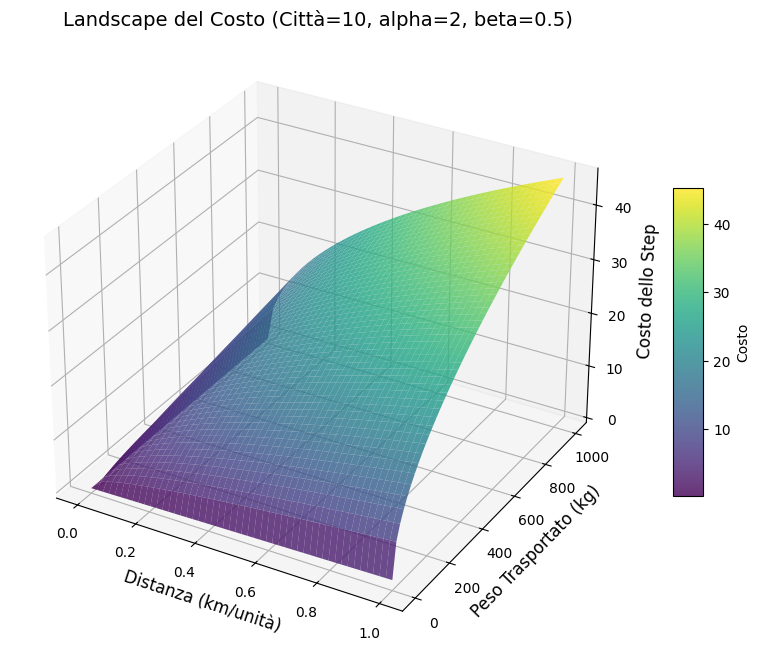

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 1. Configurazione dei parametri del problema
# Puoi modificare questi valori per vedere come cambia il grafico
num_cities = 10
alpha = 2
beta = 0.5

# 2. Definizione degli assi (Range di Distanza e Peso)
# Stima della distanza massima in un quadrato 1x1 (diagonale ~1.41)
# Creiamo 50 punti tra 0 e 1.5 per l'asse della distanza
d_range = np.linspace(0, 1, 50)

# Stima del peso massimo trasportabile
# Con 10 città, assumiamo un massimo teorico di oro totale (es. 9 città * 1000kg = 9000)
# Creiamo 50 punti tra 0 e 9000 per l'asse del peso
w_range = np.linspace(0, 1000, 50)

# 3. Creazione della griglia (Meshgrid) per il plot 3D
D, W = np.meshgrid(d_range, w_range)

# 4. Calcolo del Costo (Z) per ogni combinazione di Distanza e Peso
# Formula: Costo = distanza + (distanza * alpha * peso) ^ beta
Z = D + (D * alpha * W) ** beta

# 5. Creazione del Grafico
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Disegno della superficie
# cmap='viridis' dà il colore dal blu (basso costo) al giallo (alto costo)
surf = ax.plot_surface(D, W, Z, cmap='viridis', edgecolor='none', alpha=0.8)

# 6. Etichette e Titoli
ax.set_title(f'Landscape del Costo (Città={num_cities}, alpha={alpha}, beta={beta})', fontsize=14)
ax.set_xlabel('Distanza (km/unità)', fontsize=12)
ax.set_ylabel('Peso Trasportato (kg)', fontsize=12)
ax.set_zlabel('Costo dello Step', fontsize=12)

# Aggiunta della barra laterale dei colori per capire l'altezza (il costo)
fig.colorbar(surf, shrink=0.5, aspect=10, label='Costo')

# Mostra il grafico
plt.show()